<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Isolation-Forest-Outlier-detector" data-toc-modified-id="Isolation-Forest-Outlier-detector-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Isolation-Forest Outlier detector</a></span><ul class="toc-item"><li><span><a href="#Homework" data-toc-modified-id="Homework-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Homework</a></span></li></ul></li></ul></div>

In [2]:
%run supportvectors-common.ipynb



<div style="color:#aaa;font-size:8pt">
<hr/>

 </blockquote>
 <hr/>
</div>



# Isolation-Forest Outlier detector

Isolation Forest is a rather effective outlier detector in common situations. Let us apply it to our `smiley` dataset, and see how it performs.

In [3]:
source = 'https://raw.githubusercontent.com/supportvectors/ml-100/master/smiley.csv'
data = pd.read_csv(source)


Recall that this data has some outliers (*pimples on the face*):

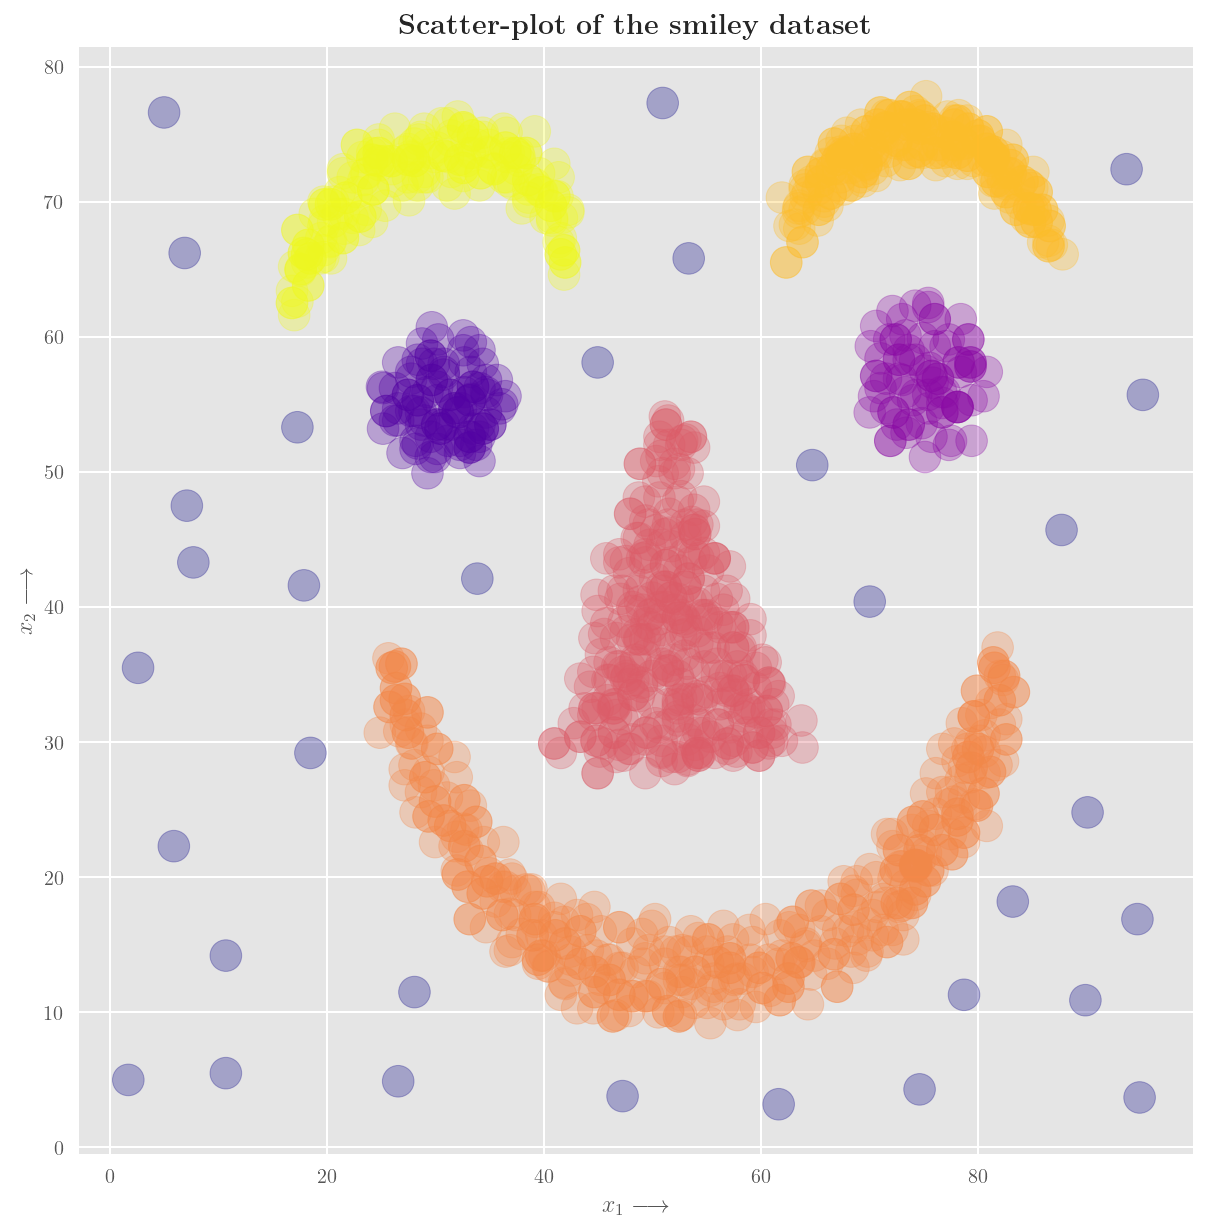

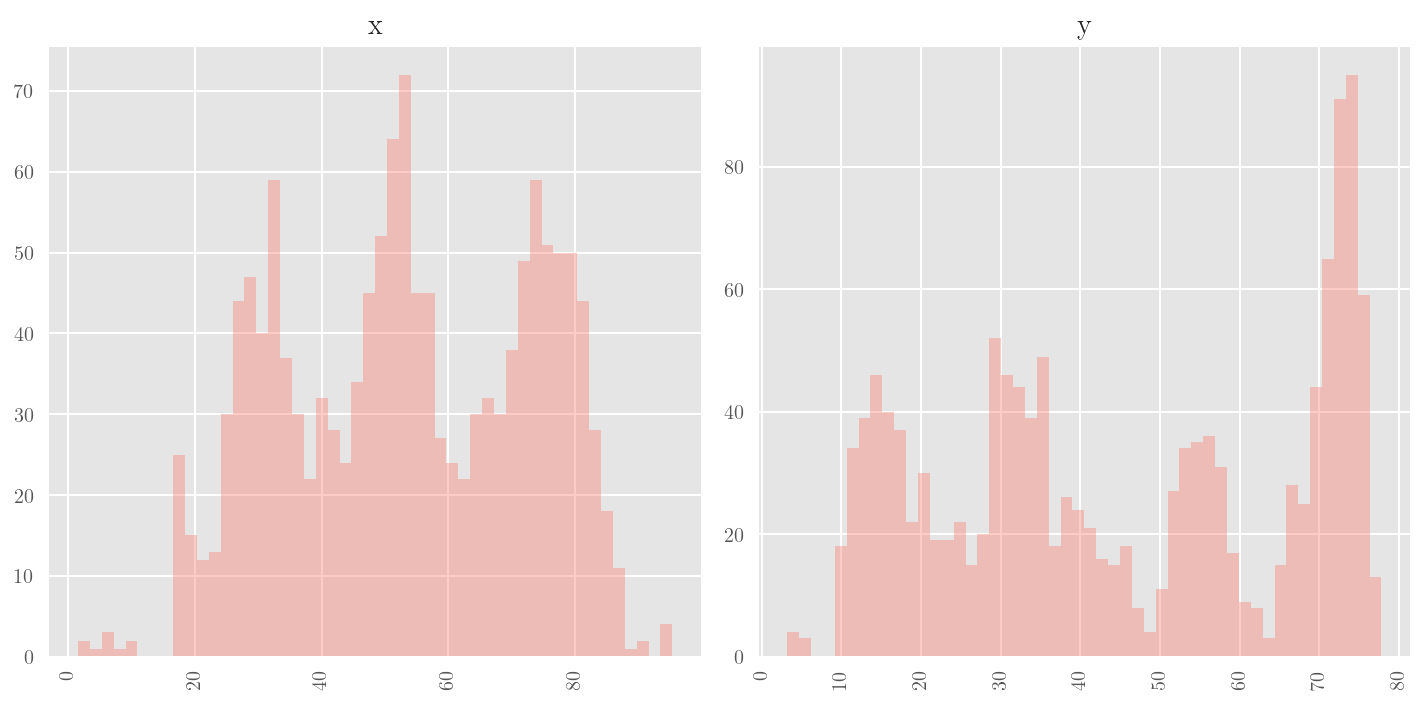

In [4]:
plt.figure(figsize=(10,10))
plt.scatter(data['x'], data['y'], alpha=0.3, s=250, cmap='plasma', c=data['t'])
plt.title(r'\textbf{Scatter-plot of the smiley dataset}')
plt.xlabel(r'$x_1\longrightarrow$')
plt.ylabel(r'$x_2\longrightarrow$')
plt.show()
data.drop(columns=['t']).hist(bins=50, alpha=0.4, color='salmon', xrot=90, figsize=(10, 5))
plt.tight_layout()

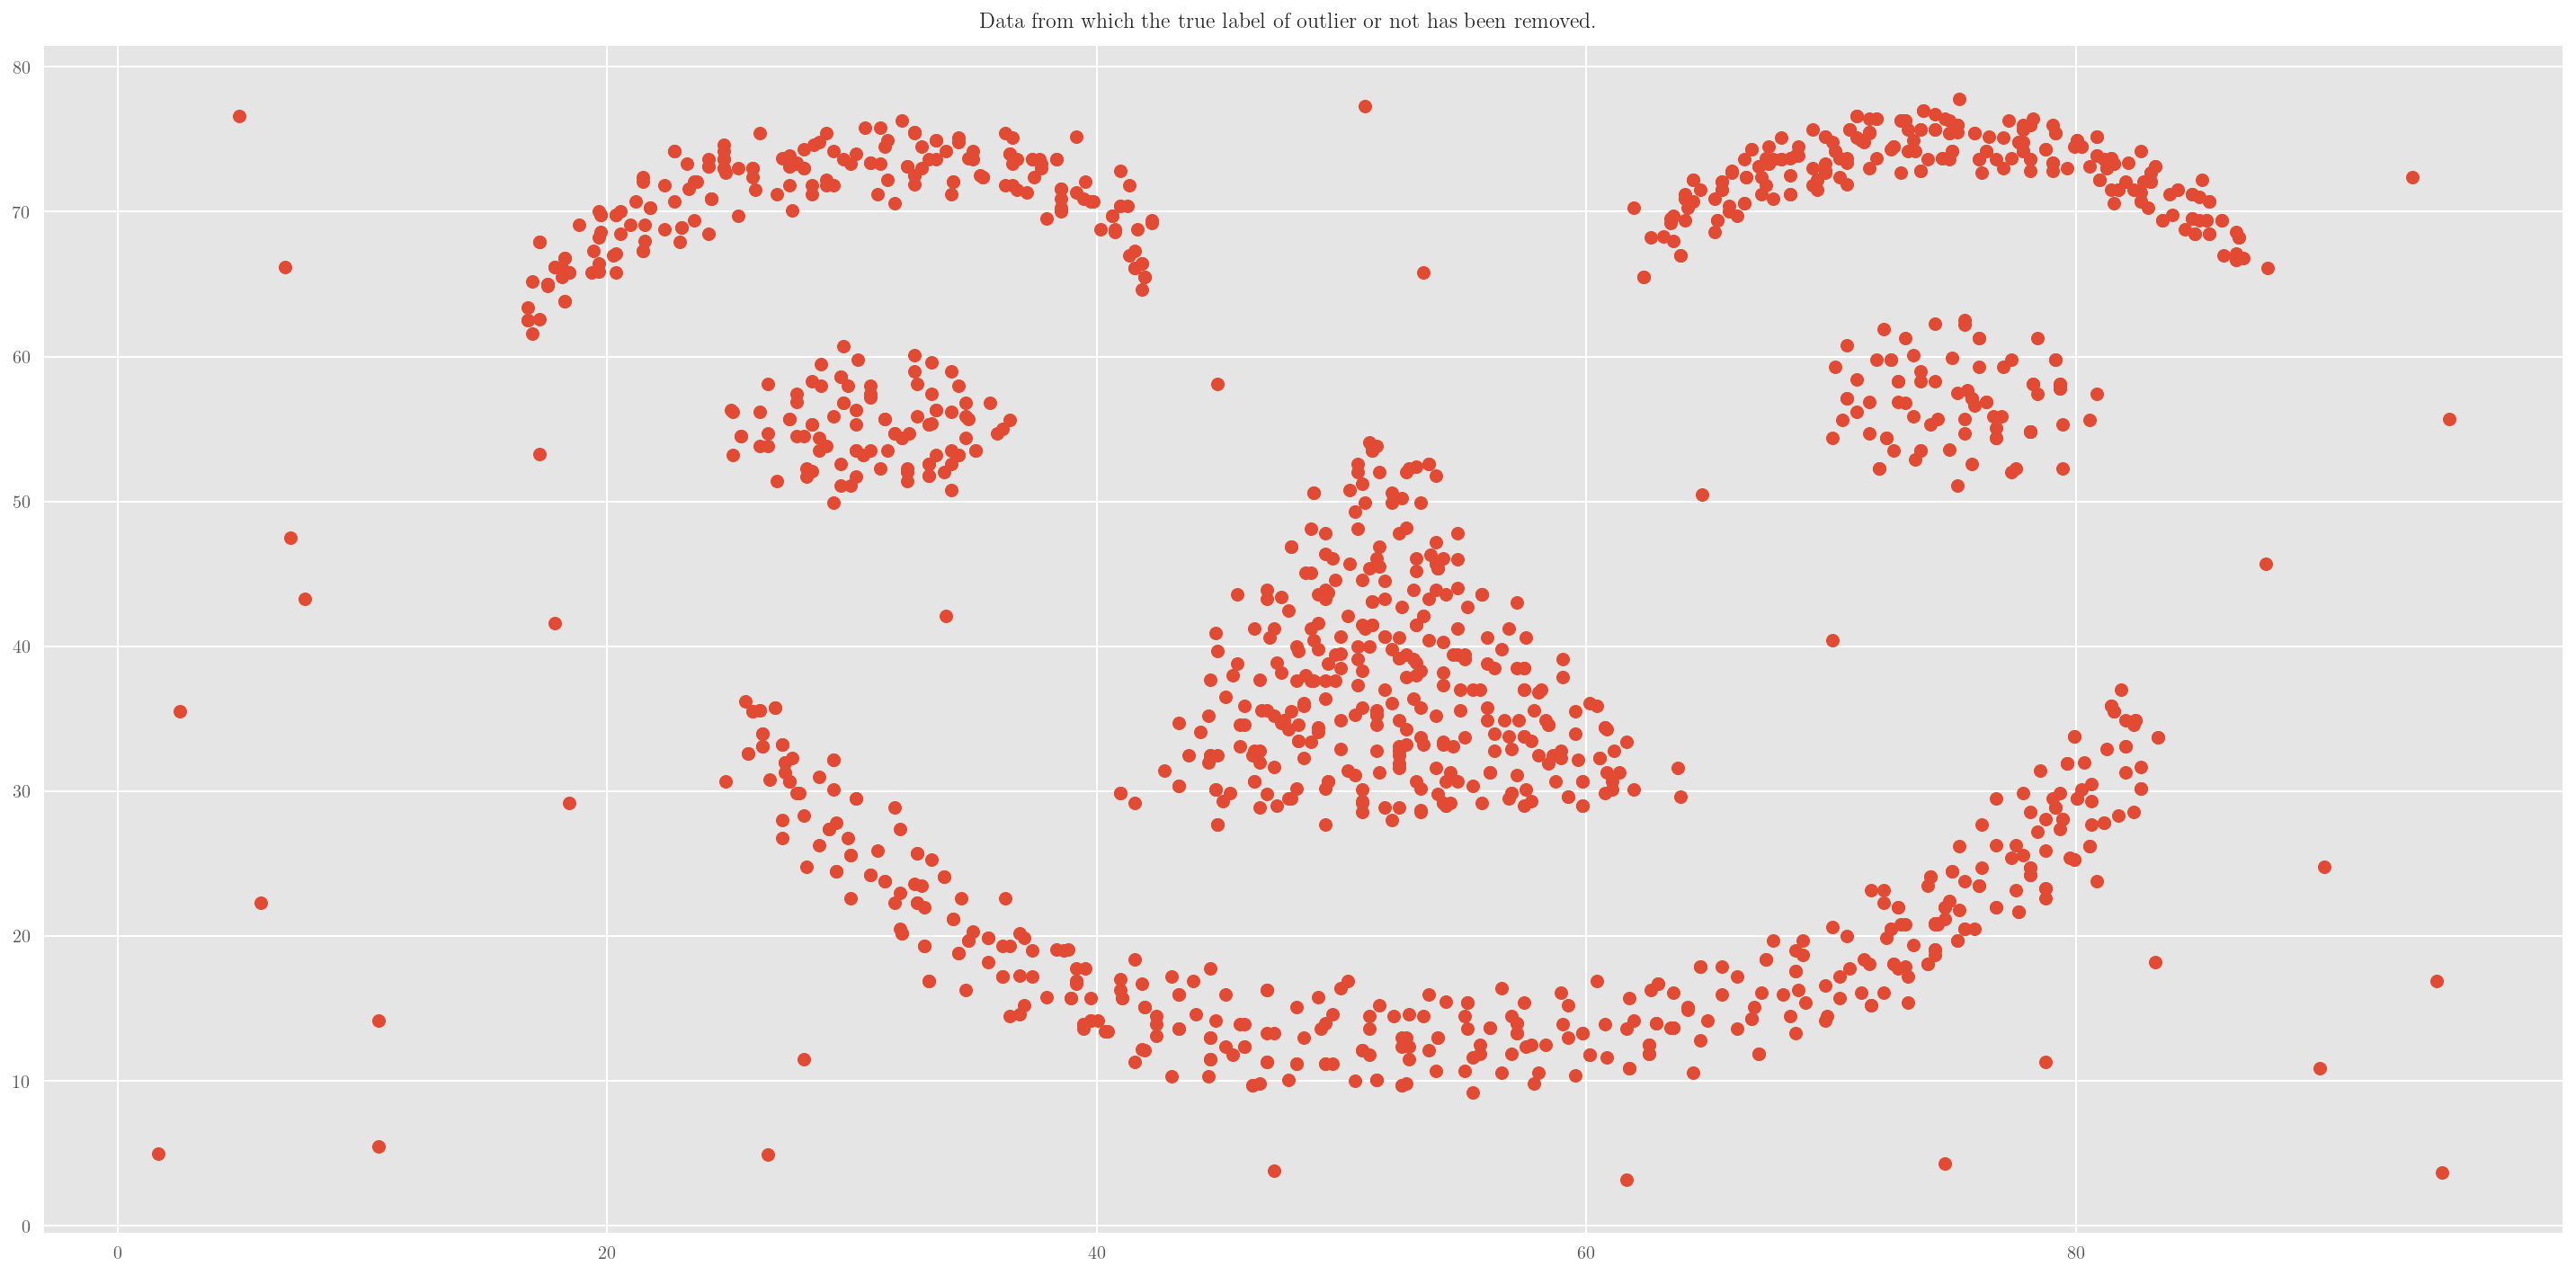

In [63]:
df = data[['x','y']]
plt.scatter(df.x, df.y)

plt.suptitle('Data from which the true label of outlier or not has been removed.')
plt.tight_layout()

In [64]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples=1000, random_state=0)
clf.fit(df)
pred=clf.predict(df)

In [65]:
df['actual'] = np.where(data.t > 0, 1, -1)
df['pred'] = pred


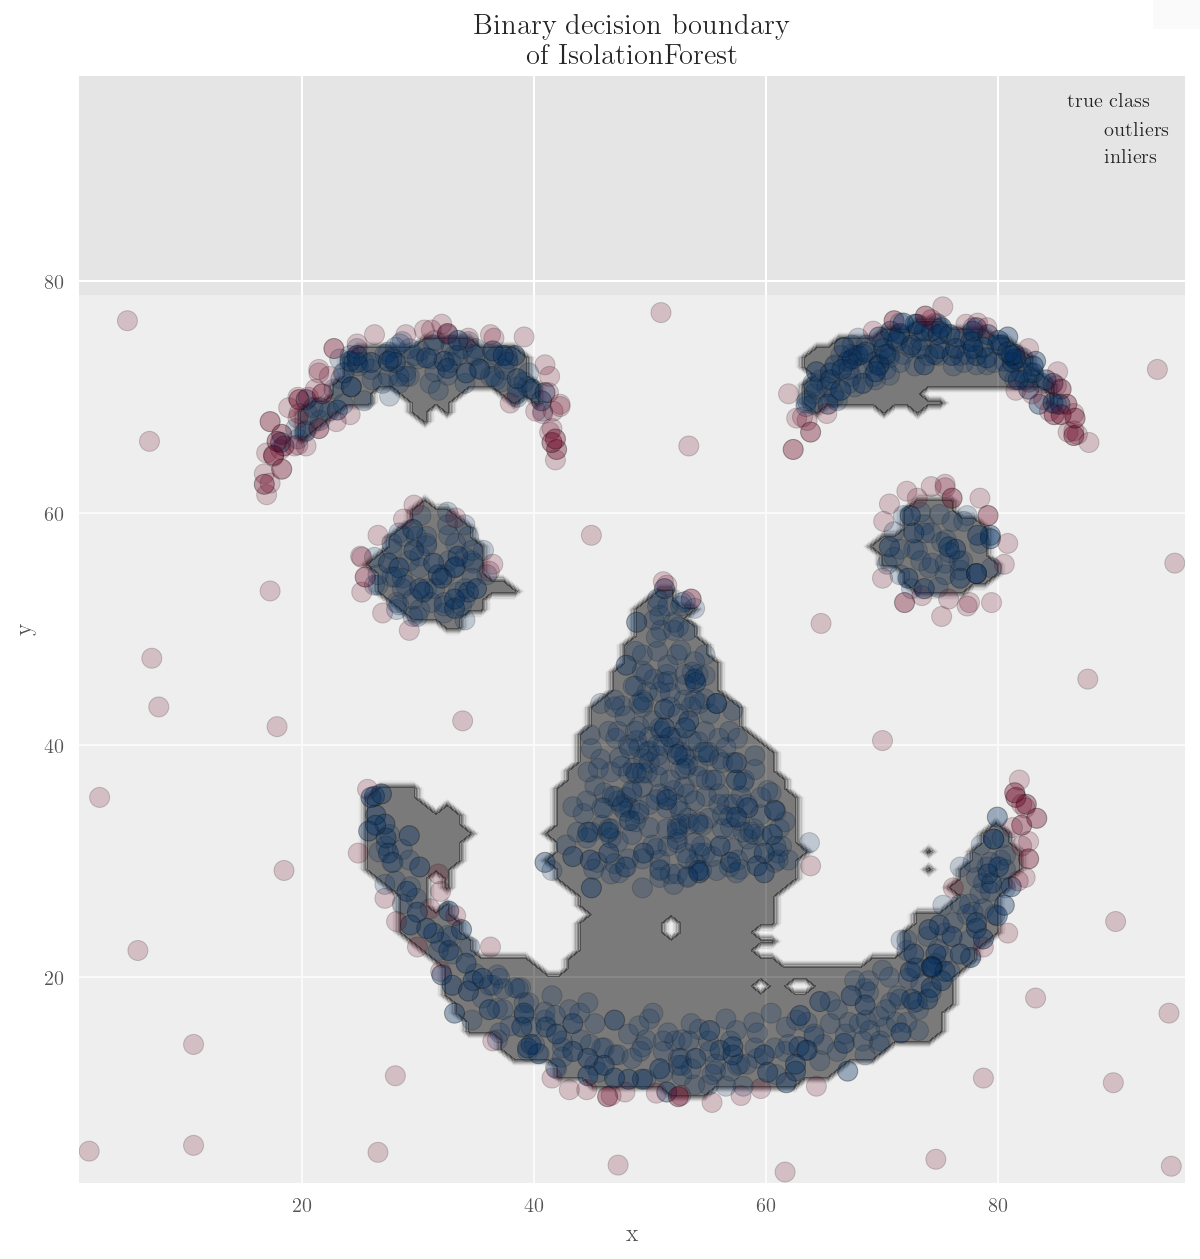

In [66]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

X = df[['x','y']]
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    response_method="predict",
    alpha=0.5,
)
disp.ax_.scatter(X.x, X.y,  s=100, alpha=0.2, edgecolor="k", c=pred, cmap='RdBu')
disp.ax_.set_title("Binary decision boundary \nof IsolationForest")
plt.axis("square")
plt.legend(labels=["outliers", "inliers"], title="true class")
plt.show()

## Homework

* How sensitive is the `IsolationForest` detector to the hyperparameter `max_samples`? Test the various values, such as 10, 100, 200, 500, 1000